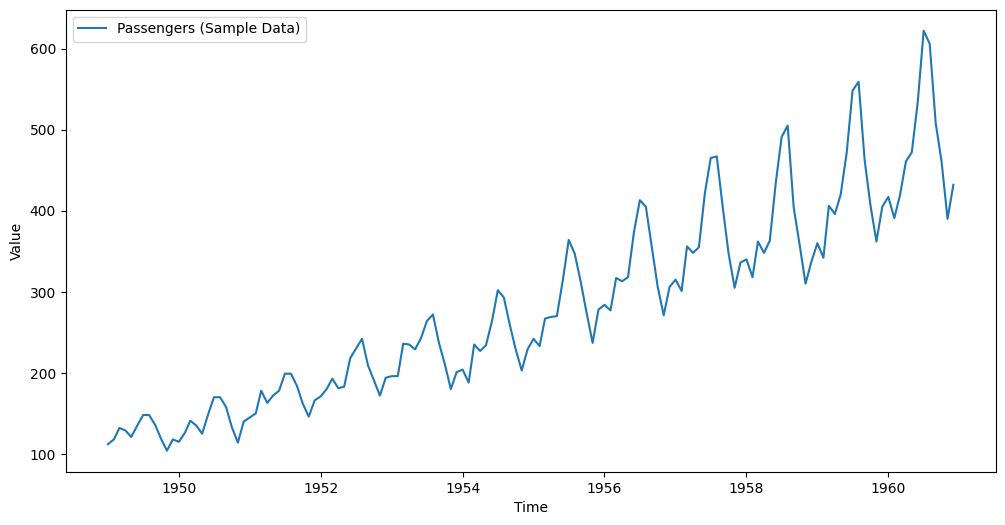

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 298ms/step - loss: 0.0815 - val_loss: 0.0279
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0170 - val_loss: 0.0261
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0124 - val_loss: 0.0531
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0128 - val_loss: 0.0366
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0093 - val_loss: 0.0261
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0096 - val_loss: 0.0263
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0082 - val_loss: 0.0276
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0088 - val_loss: 0.0263
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0086 - val_loss: 0.0265
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0084 - val_loss: 0.0270
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0089 - val_loss: 0.0265
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0080 - val_loss: 0.0260

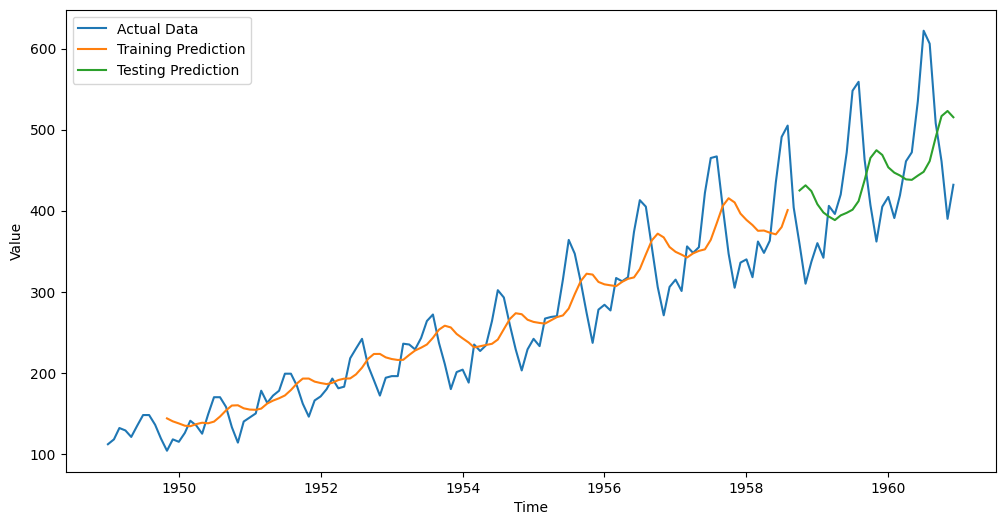

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load a sample time-series dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url)
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
data = data[['Passengers']]

# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(data, label='Passengers (Sample Data)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Data normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create dataset for LSTM
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 10
X, y = create_dataset(scaled_data, time_step)

# Reshape for LSTM input
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(100, return_sequences=True, input_shape=(time_step, 1)),
    tf.keras.layers.LSTM(100, return_sequences=False),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Predict
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Visualize predictions
plt.figure(figsize=(12, 6))
plt.plot(data.index, scaler.inverse_transform(scaled_data), label='Actual Data')
plt.plot(data.index[time_step:len(train_predict)+time_step], train_predict, label='Training Prediction')
plt.plot(data.index[len(data)-len(test_predict):], test_predict.flatten(), label='Testing Prediction')  # FIXED
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()
